# Preparación del Dataset

In [286]:
import kagglehub

path = kagglehub.dataset_download("stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/jaume/.cache/kagglehub/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/versions/1


In [287]:
import os
import zipfile
import glob
import pandas as pd


dataset_path = path
for zip_path in glob.glob(os.path.join(dataset_path, "**", "*.zip"), recursive=True):
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(dataset_path)

# Busca todos los CSV 
csv_files = glob.glob(os.path.join(dataset_path, "**", "*.csv"), recursive=True)
print("Ficheros CSV encontrados:")
for f in csv_files:
    print(" -", f)

# Carga todos en un diccionario de DataFrames
dfs = {}
for f in csv_files:
    name = os.path.splitext(os.path.basename(f))[0]
    dfs[name] = pd.read_csv(f)
    print(f"\n{name}: {dfs[name].shape} filas × columnas")
    display(dfs[name].head())


Ficheros CSV encontrados:
 - /home/jaume/.cache/kagglehub/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/versions/1/rotten_tomatoes_movies.csv
 - /home/jaume/.cache/kagglehub/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/versions/1/rotten_tomatoes_critic_reviews.csv

rotten_tomatoes_movies: (17712, 22) filas × columnas


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3



rotten_tomatoes_critic_reviews: (1130017, 8) filas × columnas


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [288]:
movies=dfs["rotten_tomatoes_movies"]
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [289]:
reviews=dfs["rotten_tomatoes_critic_reviews"]
reviews.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

### Guardar la columna link como id

In [290]:
# Convertir el titulo de la pelicula en un id
movies['movie_id'] = movies['rotten_tomatoes_link']
reviews['movie_id'] = reviews['rotten_tomatoes_link']

movies = movies.drop(columns=['rotten_tomatoes_link'])
reviews = reviews.drop(columns=['rotten_tomatoes_link'])

movies.head()

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,movie_id
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,m/0814255
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,m/0878835
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,m/10
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,m/1000013-12_angry_men
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,m/1000079-20000_leagues_under_the_sea


### De las columnas de fechas, realmente nos interesa solo el año

In [291]:
# Convertir a datatype
movies['original_release_date'] = pd.to_datetime(
    movies['original_release_date'], errors='coerce'
)
movies['streaming_release_date'] = pd.to_datetime(
    movies['streaming_release_date'], errors='coerce'
)

# Extrer el año
movies['original_release_year'] = movies['original_release_date'].dt.year
movies['streaming_release_year'] = movies['streaming_release_date'].dt.year

movies = movies.drop(
    columns=['original_release_date', 'streaming_release_date']
)

movies[['original_release_year', 'streaming_release_year']].head()


,original_release_year,streaming_release_year
0,2010.0,2015.0
1,2010.0,2012.0
2,1979.0,2014.0
3,1957.0,2017.0
4,1954.0,2016.0


### Convertir a valores numericos

In [292]:
# Diccionarios de mapeo
tm_map = {
    'Rotten': 0,
    'Fresh': 1,
    'Certified-Fresh': 2
}
aud_map = {
    'Spilled': 0,
    'Upright': 1
}
content_map = {
    'G':       0,
    'PG':      1,
    'PG-13':   2,
    'R':       3,
    'NC-17':   4,
    'NR':     -1 
}
# Aplicar el mapeo
movies['tomatometer_status_code'] = movies['tomatometer_status'].map(tm_map)
movies['audience_status_code']    = movies['audience_status'].map(aud_map)
movies['content_rating_code'] = movies['content_rating'].map(content_map)

movies = movies.drop(columns=['tomatometer_status', 'audience_status','content_rating'])

movies[['tomatometer_status_code', 'audience_status_code','content_rating_code']].head()


,tomatometer_status_code,audience_status_code,content_rating_code
0,0.0,0.0,1.0
1,2.0,1.0,3.0
2,1.0,0.0,3.0
3,2.0,1.0,-1.0
4,1.0,1.0,0.0


In [293]:
movies[['genres']].head()

,genres
0,"Action & Adventure, Comedy, Drama, Science Fic..."
1,Comedy
2,"Comedy, Romance"
3,"Classics, Drama"
4,"Action & Adventure, Drama, Kids & Family"


In [294]:
# Hacer One hot para los géneros
genres_dummies = movies['genres'].str.get_dummies(sep=', ')

movies = pd.concat([movies, genres_dummies], axis=1)

movies = movies.drop(columns=['genres'])
movies.head()

,movie_title,movie_info,critics_consensus,directors,authors,actors,runtime,production_company,tomatometer_rating,tomatometer_count,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,149.0,...,0,0,0,0,0,1,0,0,0,0
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,87.0,142.0,...,0,0,0,0,0,0,0,0,0,0
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",122.0,Waner Bros.,67.0,24.0,...,0,0,0,0,1,0,0,0,0,0
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Criterion Collection,100.0,54.0,...,0,0,0,0,0,0,0,0,0,0
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,Disney,89.0,27.0,...,0,1,0,0,0,0,0,0,0,0


### NaNs

In [295]:
import pandas as pd

# Columnas numéricas a rellenar con la media
num_cols = [
    'runtime',
    'tomatometer_rating',
    'tomatometer_count',
    'audience_rating',
    'audience_count',
    'original_release_year',
    'streaming_release_year'
]

# Columnas categóricas a rellenar con la moda (para no obtener valores raros como película buena-mala (0.5))
cat_cols = [
    'tomatometer_status_code',
    'audience_status_code',
    'content_rating_code'
]

for col in num_cols:
    mean_val = movies[col].mean()
    movies[col].fillna(mean_val, inplace=True)

for col in cat_cols:
    mode_val = movies[col].mode(dropna=True)[0]
    movies[col].fillna(mode_val, inplace=True)


/tmp/ipykernel_12468/2350125928.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies[col].fillna(mean_val, inplace=True)
/tmp/ipykernel_12468/2350125928.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Para este ejemplo, vamos a probar sin los atributos que precisen de NLP

In [296]:
movies.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'directors',
       'authors', 'actors', 'runtime', 'production_company',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'movie_id', 'original_release_year', 'streaming_release_year',
       'tomatometer_status_code', 'audience_status_code',
       'content_rating_code', 'Action & Adventure', 'Animation',
       'Anime & Manga', 'Art House & International', 'Classics', 'Comedy',
       'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality',
       'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object')

In [297]:
drop_columns=["movie_info",	"critics_consensus",	"directors",	"authors","actors","production_company","runtime","tomatometer_top_critics_count",	"tomatometer_fresh_critics_count",	"tomatometer_rotten_critics_count"]
movies=movies.drop(columns=drop_columns)
movies

,movie_title,tomatometer_rating,tomatometer_count,audience_rating,audience_count,movie_id,original_release_year,streaming_release_year,tomatometer_status_code,audience_status_code,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0,m/0814255,2010.0,2015.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,Please Give,87.0,142.0,64.0,11574.0,m/0878835,2010.0,2012.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,10,67.0,24.0,53.0,14684.0,m/10,1979.0,2014.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0,m/1000013-12_angry_men,1957.0,2017.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0,m/1000079-20000_leagues_under_the_sea,1954.0,2016.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,Zoot Suit,56.0,9.0,74.0,1195.0,m/zoot_suit,1981.0,2016.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
17708,Zootopia,98.0,291.0,92.0,101511.0,m/zootopia,2016.0,2016.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
17709,Zorba the Greek,80.0,10.0,86.0,7146.0,m/zorba_the_greek,1964.0,2015.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
17710,Zulu,96.0,23.0,91.0,30193.0,m/zulu,1964.0,2017.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### NaNs

### Preparamos el dataset para el entrenamiento

In [298]:
id_columns=["movie_title",	"movie_id"]
movies_sin_id=movies.drop(columns=id_columns)


# Entrenamineto del SOM

In [299]:
from somJ.som import SoM
import somJ.config as config

In [300]:
# pelis_buenas=movies_sin_id[movies_sin_id["tomatometer_rating"]>50]

In [301]:
X = movies_sin_id.to_numpy()


In [302]:
som = SoM(
    method="random",
    data=X,
    total_nodes=1000
)
som.train(
    train_data=X,
    learn_rate=config.LEARNING_RATE,
    radius_sq=config.RADIUS_SQ,
    lr_decay=config.LR_DECAY,
    radius_decay=config.RADIUS_DECAY,
    epochs=50,
    update="batchmap",
    batch_size=config.BATCH_SIZE,
    step=10,
    save=config.SAVE_HISTORY,
    prog_bar=True
)

Entrenando SOM: 100%|█████████████████████| 50/50 [01:50<00:00,  2.22s/it, lr=0.00863, radius=0.294]


In [303]:
neurons = {}
X_scaled = som.scaler.fit_transform(X)
for i, x in enumerate(X_scaled):
    winner = tuple(map(int, som.find_winner(x)))
    movie_id = movies.iloc[i]['movie_id']
    rating   = movies.iloc[i]['tomatometer_rating']
    neurons.setdefault(winner, []).append((movie_id, rating))

# Ordenar cada lista y conservar solo los IDs
for neuron, mr_list in neurons.items():
    # mr_list es [(id1, rating1), (id2, rating2), …]
    mr_list_sorted = sorted(mr_list, key=lambda pair: pair[1], reverse=True)
    # Reemplazamos la lista por solo los IDs, ordenados
    neurons[neuron] = [movie_id for movie_id, _ in mr_list_sorted]

In [304]:
neuron_counts = { neuron: len(titles)
                  for neuron, titles in neurons.items() }


import pandas as pd

counts_df = pd.DataFrame.from_dict(
    neuron_counts, 
    orient='index', 
    columns=['movie_count']
)
counts_df.index.name = 'neuron'
counts_df = counts_df.sort_values('movie_count', ascending=False)


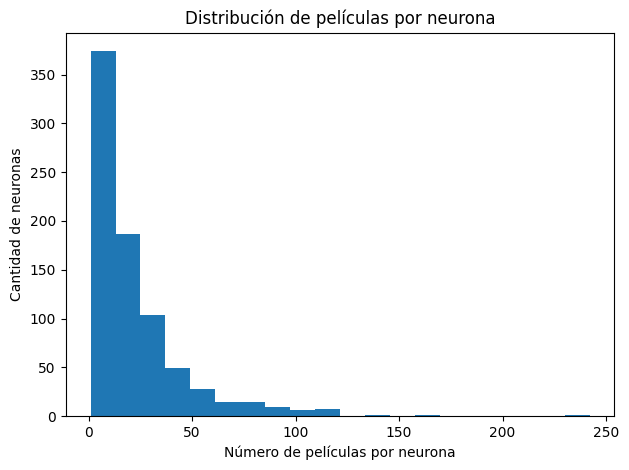

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

neuron_counts = { coord: len(titles) for coord, titles in neurons.items() }
counts_df = pd.DataFrame.from_dict(
    neuron_counts,
    orient='index',
    columns=['movie_count']
)

# Histograma de la distribución
plt.figure()
plt.hist(counts_df['movie_count'], bins=20)
plt.title('Distribución de películas por neurona')
plt.xlabel('Número de películas por neurona')
plt.ylabel('Cantidad de neuronas')
plt.tight_layout()
plt.show()


# Sistema de recomendación

In [306]:
reviews.columns

Index(['critic_name', 'top_critic', 'publisher_name', 'review_type',
       'review_score', 'review_date', 'review_content', 'movie_id'],
      dtype='object')

In [307]:
reviews.head()

,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_id
0,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,m/0814255
1,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",m/0814255
2,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,m/0814255
3,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,m/0814255
4,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,m/0814255


In [308]:
def user_films(name):
    lk_fresh = reviews.loc[
        (reviews['critic_name'] == name) &
        (reviews['review_type'] == 'Fresh'),
        'movie_id'
    ]
    lk_fresh_ids = lk_fresh.unique()

    return lk_fresh_ids


In [309]:
import pandas as pd

# Cuántas reseñas tiene cada crítico
counts = reviews['critic_name'].value_counts()

# Critios con más reseñas
top_critics = counts.head(5)

# Un rango medio de reseñas
q_low, q_high = counts.quantile([0.6, 0.8])
mid_critics = counts[(counts >= q_low) & (counts <= q_high)].head(5)

# Críticos con pocas reseñas
low_critics = counts.tail(5)
q_low, q_high = counts.quantile([0.4, 0.6])
low_critics = counts[(counts >= q_low) & (counts <= q_high)].head(5)


print("Críticos con más reseñas:")
print(top_critics.to_string(), "\n")

print("Críticos de rango medio:")
print(mid_critics.to_string(), "\n")

print("Críticos con menos reseñas:")
print(low_critics.to_string())


Críticos con más reseñas:
critic_name
Emanuel Levy       8173
Dennis Schwartz    6526
Roger Ebert        6417
Brian Orndorf      6082
Frank Swietek      6038 

Críticos de rango medio:
critic_name
Leah Sydney       53
Verne Gay         53
Andrew Kasch      53
Kevin Wight       53
Caroline Siede    53 

Críticos con menos reseñas:
critic_name
Nick Barbaro         9
Tufayel Ahmed        9
Stefania Sarrubba    9
George Fenwick       9
JM Mutore            9


In [310]:
film_list=user_films("Leah Sydney")


In [311]:
film_list

array(['m/42_2013', 'm/a_quiet_place_2018', 'm/a_wrinkle_in_time_2018',
       'm/beauty_and_the_beast_2017', 'm/book_club',
       'm/breakthrough_2019', 'm/captain_america_civil_war',
       'm/cats_2019', 'm/cinderella_2013', 'm/echo_in_the_canyon',
       'm/final_portrait', 'm/gloria_bell', 'm/hell_or_high_water',
       'm/human_capital_2020', 'm/inside_out_2015', 'm/isle_of_dogs_2018',
       'm/jurassic_world_fallen_kingdom', 'm/kong_skull_island',
       'm/lady_bird', 'm/last_vegas_2013',
       'm/linda_ronstadt_the_sound_of_my_voice', 'm/lovelace',
       'm/mamma_mia_here_we_go_again', 'm/mary_queen_of_scots',
       'm/neighbors_2_sorority_rising', 'm/pacific_rim_2013',
       'm/pavarotti', 'm/petes_dragon_2016', 'm/philomena',
       'm/sausage_party', 'm/skyscraper_2018', 'm/split_2017', 'm/storks',
       'm/stuntwomen', 'm/the_florida_project',
       'm/the_happytime_murders_2017', 'm/the_infiltrator',
       'm/the_irishman', 'm/the_last_movie_star_2018', 'm/the_ni

In [312]:
filtered_movies = movies[movies['movie_id'].isin(film_list)]

# Reindexar 
filtered_movies = filtered_movies.reset_index(drop=True)


In [313]:
id_columns=["movie_title",	"movie_id"]
filtered_movies_sin_id=filtered_movies.drop(columns=id_columns)

In [314]:
X_filted = filtered_movies_sin_id.to_numpy()
X_filted_scaled=som.scaler.fit_transform(X_filted)

In [315]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(
    X_filted_scaled, # vectores de las peliculas
    film_list, # titulo de las peliculas
    test_size=0.3,      
    random_state=42     
)

In [316]:
# lista de las neuronas entre las que se distribuyen las peliculas elegidas
neuronas_ganadoras=[]
for x in X_train:
    (m,n) = som.find_winner(x) 
    winner=(int(m),int(n))
    if winner not in neuronas_ganadoras: neuronas_ganadoras.append(winner)

In [317]:
# Parámetros
m, n = som.grid_size    

# Vecinos
d8 = [(di,dj) for di in (-1,0,1) for dj in (-1,0,1) if not (di==0 and dj==0)]

adjacents = set()
for i, j in neuronas_ganadoras:
    for di, dj in d8:
        ni, nj = i + di, j + dj
        # Comprueba que estás dentro de la grilla
        if 0 <= ni < m and 0 <= nj < n:
            adjacents.add((ni, nj))

adjacents -= set(neuronas_ganadoras)

# Lista de coordenadas vecinas
adj_list = list(adjacents)
print(f"Hay {len(adj_list)} neuronas adyacentes: {adj_list}")


Hay 170 neuronas adyacentes: [(15, 21), (6, 18), (16, 20), (4, 9), (20, 20), (17, 3), (14, 13), (22, 26), (14, 22), (11, 5), (9, 17), (32, 12), (24, 8), (18, 1), (24, 17), (24, 26), (22, 19), (19, 2), (22, 28), (14, 24), (9, 10), (2, 4), (1, 8), (26, 7), (32, 23), (18, 3), (24, 19), (24, 28), (25, 27), (3, 8), (31, 24), (22, 21), (9, 12), (32, 7), (13, 3), (32, 25), (33, 24), (13, 21), (26, 18), (34, 7), (12, 13), (3, 10), (14, 10), (12, 22), (14, 19), (5, 16), (4, 18), (32, 9), (13, 5), (10, 15), (16, 19), (31, 10), (34, 9), (22, 7), (14, 3), (20, 19), (17, 2), (14, 12), (12, 24), (11, 4), (5, 18), (33, 10), (24, 7), (1, 5), (25, 6), (10, 8), (10, 17), (16, 21), (31, 12), (22, 9), (12, 8), (14, 5), (20, 21), (3, 5), (22, 27), (23, 26), (14, 23), (10, 10), (1, 7), (26, 6), (25, 8), (19, 22), (13, 9), (33, 12), (24, 9), (24, 18), (25, 17), (2, 6), (25, 26), (3, 7), (20, 23), (22, 20), (21, 22), (31, 23), (4, 6), (23, 28), (8, 15), (10, 12), (13, 11), (11, 11), (2, 8), (33, 23), (25, 19)

Entrenando SOM:   4%|▌              | 2/50 [5:18:37<127:26:52, 9558.59s/it, lr=0.0951, radius=0.975]


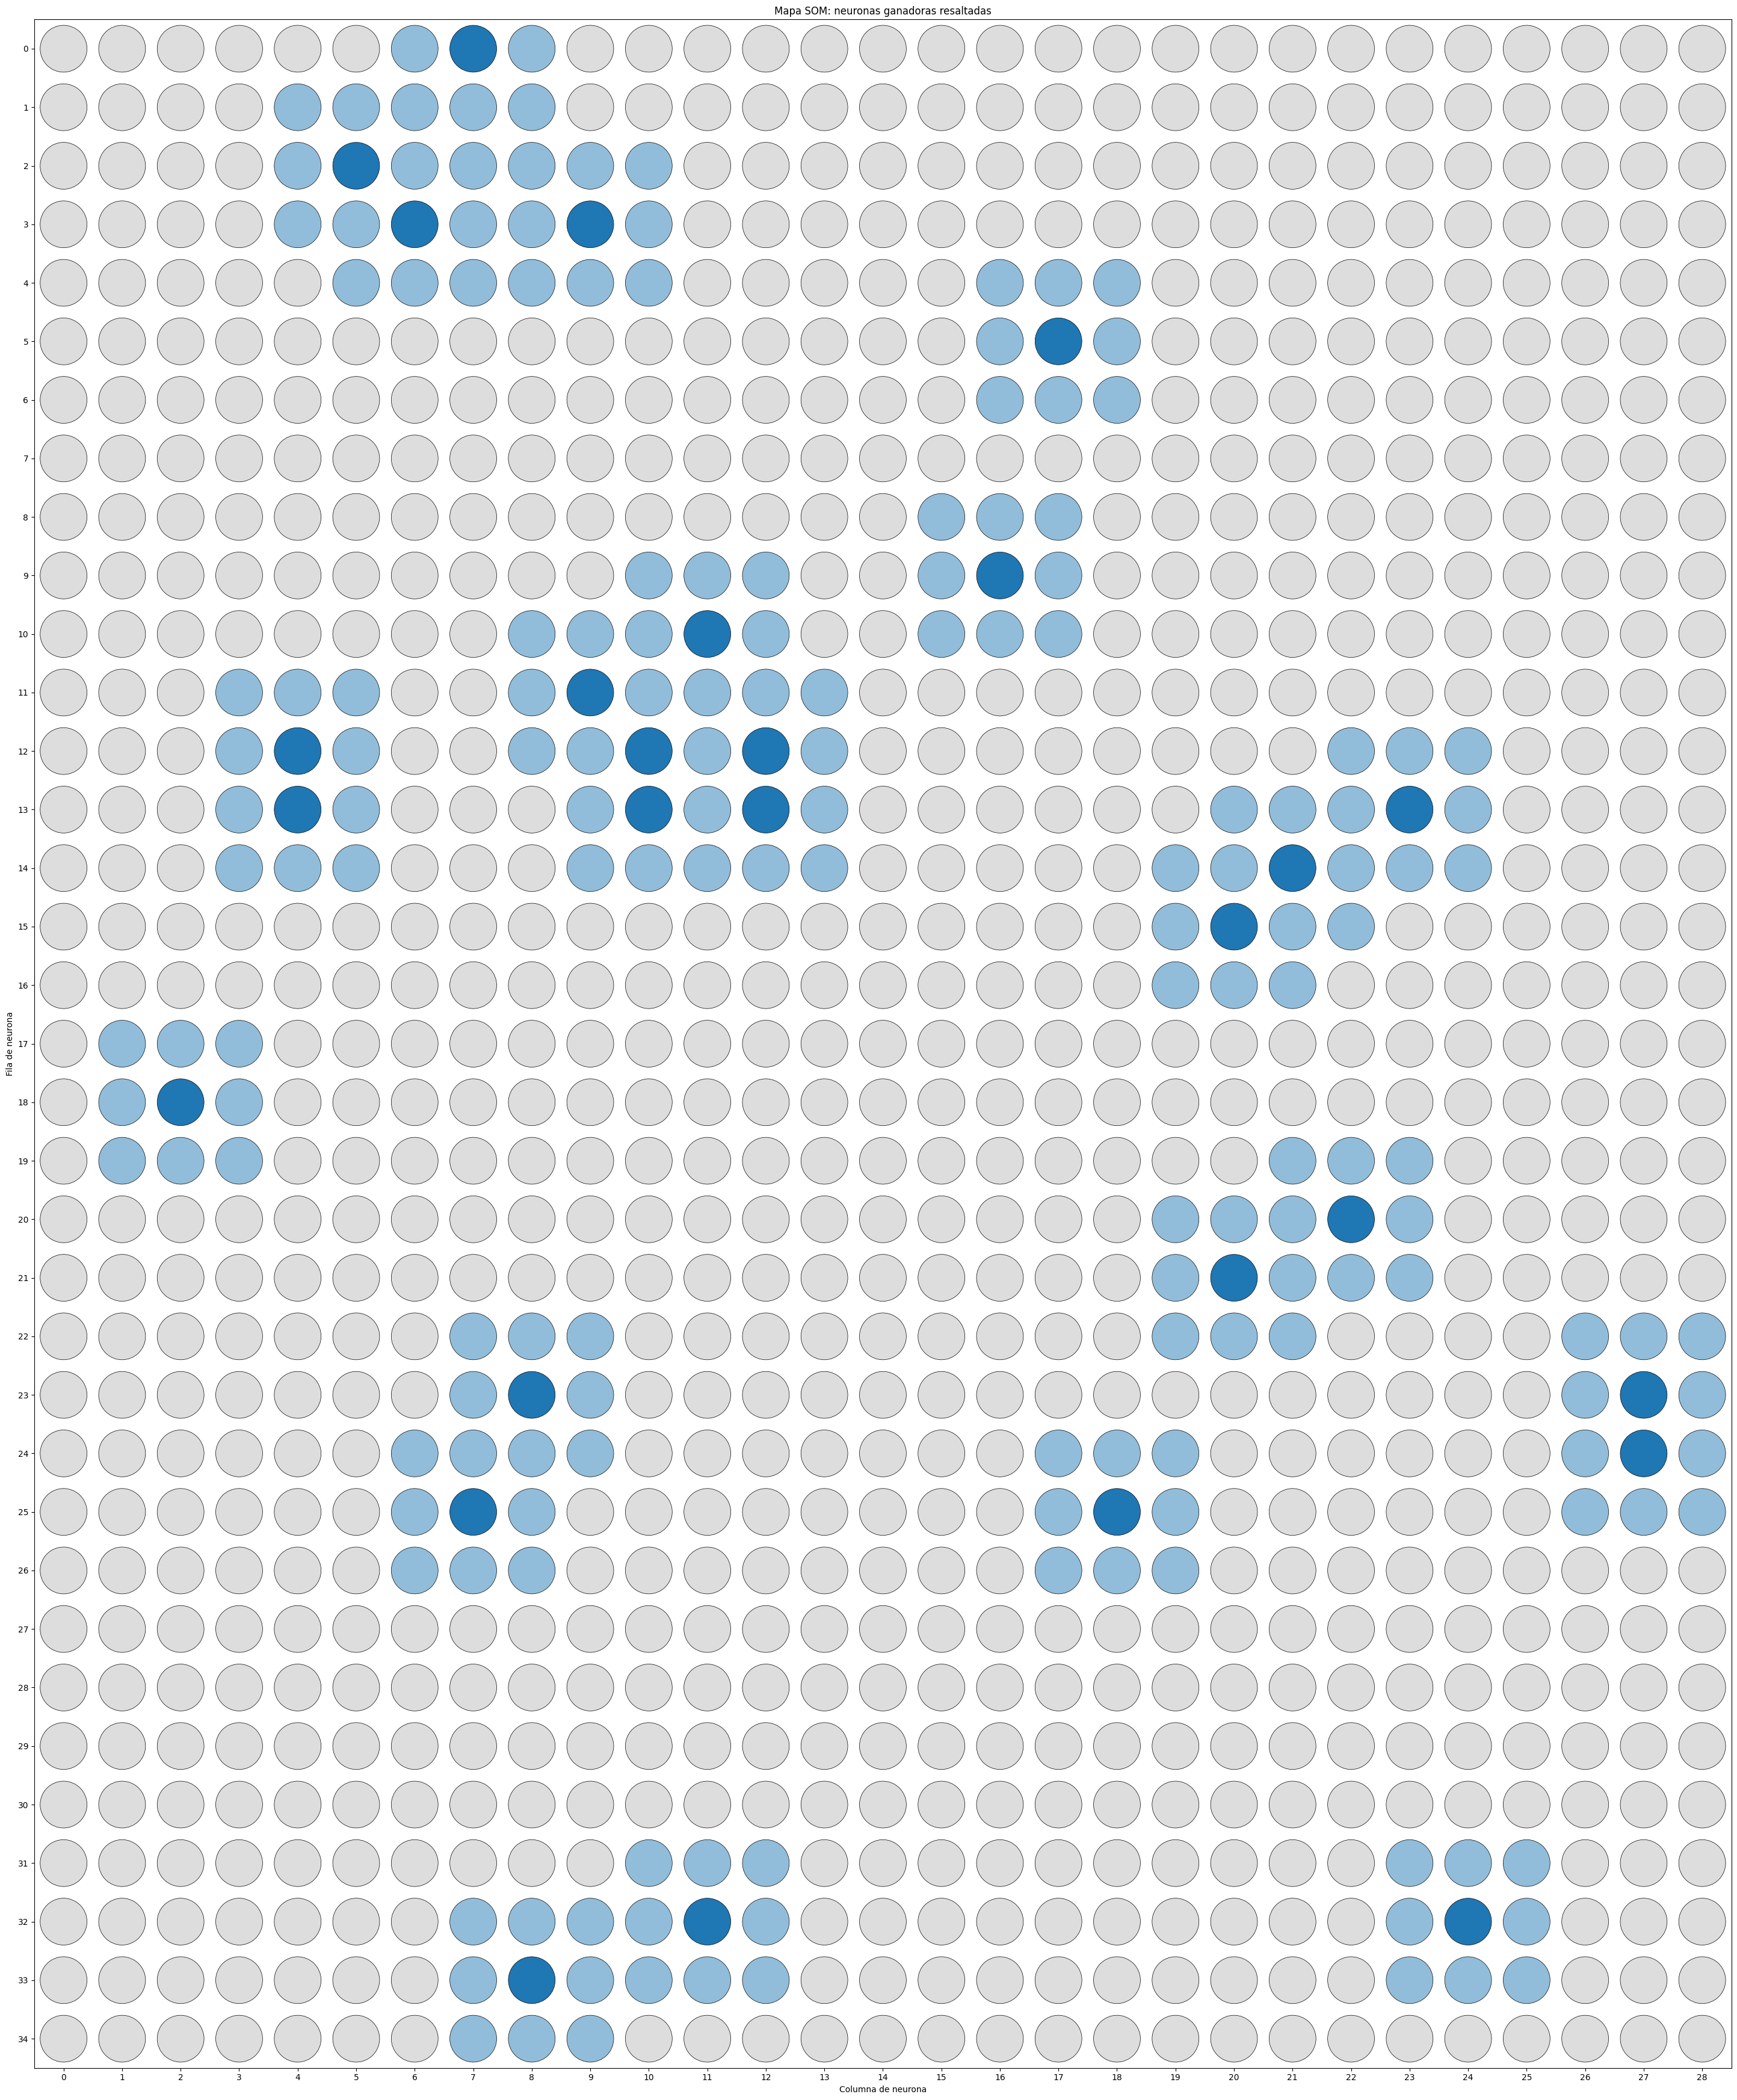

In [318]:
import numpy as np
import matplotlib.pyplot as plt



winner_color = '#1f77b4'
adj_color = '#91BDDA'
other_color  = '#dddddd'  

# Dibujar el mapa
fig, ax = plt.subplots(figsize=(n, m))
for i in range(m):
    for j in range(n):
        if (i, j) in neuronas_ganadoras:
            facecol = winner_color
        elif (i, j) in adj_list:
            facecol = adj_color
        else: facecol =other_color
        circ = plt.Circle((j, i), 0.4, facecolor=facecol,
                          edgecolor='k', linewidth=0.5)
        ax.add_patch(circ)

# Ajustes de ejes
ax.set_xlim(-0.5, n-0.5)
ax.set_ylim(-0.5, m-0.5)
ax.set_aspect('equal')
ax.invert_yaxis()               
ax.set_xticks(range(n))
ax.set_yticks(range(m))
ax.set_xlabel('Columna de neurona')
ax.set_ylabel('Fila de neurona')
ax.set_title('Mapa SOM: neuronas ganadoras resaltadas')

plt.tight_layout()
plt.show()


In [319]:
list_explorar=neuronas_ganadoras+adj_list

In [320]:
import random
recomend = {}

# De las neuronas ganadoras intenta coger las mejores 10 peliculas
for coord in neuronas_ganadoras:
    all_titles = neurons.get(coord, [])
    # Excluye los que ya están en y_train y por lo tanto, sabemos que ha visto
    candidates = [t for t in all_titles if t not in y_train]
    # Si hay menos de 15, tómalos todos; si no, coge los 15 primeros
    n = min(15, len(candidates))
    recomend[coord] = candidates[:n]


# De las neuronas vecinas intenta coger las mejores 5 peliculas
for coord in adj_list:
    all_titles = neurons.get(coord, [])
    candidates = [t for t in all_titles if t not in y_train]
    n = min(5, len(candidates))
    recomend[coord] = candidates[:n]

# Imprimir las recomendaciones de cada neurona
for coord, pelis in recomend.items():
    print(f"Neurona {coord}:")
    for title in pelis:
        print("  -", title)
    print()

list_recomend = [title 
              for titles in recomend.values() 
              for title in titles]

print("Total de títulos recomendados:", len(list_recomend))


Neurona (5, 17):
  - m/close_encounters_of_the_third_kind
  - m/looper
  - m/mad_max_2_the_road_warrior
  - m/source_code
  - m/jurassic_park
  - m/minority_report
  - m/spiderman
  - m/hellboy_2_the_golden_army
  - m/star_trek_vi_the_undiscovered_country
  - m/cloverfield
  - m/kong_skull_island
  - m/1174279-wanted

Neurona (20, 22):
  - m/whitewash_2014
  - m/the_price_2017
  - m/the_kindergarten_teacher
  - m/life_of_riley
  - m/second_coming_2014
  - m/stop_the_pounding_heart
  - m/five_star
  - m/sobibor
  - m/stray_bullets
  - m/everyday_2013
  - m/go_for_sisters_2013
  - m/memphis_2013
  - m/putty_hill
  - m/take_me_to_the_river_2016
  - m/the_last_sentence

Neurona (3, 9):
  - m/black_panther_2018
  - m/avengers_endgame
  - m/star_trek_11
  - m/the_dark_knight
  - m/war_for_the_planet_of_the_apes
  - m/logan_2017
  - m/terminator_2_judgment_day
  - m/thor_ragnarok_2017
  - m/wonder_woman_2017
  - m/spider_man_homecoming
  - m/1017712-robocop
  - m/dawn_of_the_planet_of_the_ape

In [321]:
# Lista de elementos de y_test que aparecen en all_titles
common = [title for title in y_test if title in list_recomend]

total_matches = len(common)
perc=int(total_matches/len(y_test)*100)
print(f"Hay {total_matches} elementos de y_test que aparecen en all_titles {perc}%")



Hay 2 elementos de y_test que aparecen en all_titles 14%


In [322]:
list_recomend

['m/close_encounters_of_the_third_kind',
 'm/looper',
 'm/mad_max_2_the_road_warrior',
 'm/source_code',
 'm/jurassic_park',
 'm/minority_report',
 'm/spiderman',
 'm/hellboy_2_the_golden_army',
 'm/star_trek_vi_the_undiscovered_country',
 'm/cloverfield',
 'm/kong_skull_island',
 'm/1174279-wanted',
 'm/whitewash_2014',
 'm/the_price_2017',
 'm/the_kindergarten_teacher',
 'm/life_of_riley',
 'm/second_coming_2014',
 'm/stop_the_pounding_heart',
 'm/five_star',
 'm/sobibor',
 'm/stray_bullets',
 'm/everyday_2013',
 'm/go_for_sisters_2013',
 'm/memphis_2013',
 'm/putty_hill',
 'm/take_me_to_the_river_2016',
 'm/the_last_sentence',
 'm/black_panther_2018',
 'm/avengers_endgame',
 'm/star_trek_11',
 'm/the_dark_knight',
 'm/war_for_the_planet_of_the_apes',
 'm/logan_2017',
 'm/terminator_2_judgment_day',
 'm/thor_ragnarok_2017',
 'm/wonder_woman_2017',
 'm/spider_man_homecoming',
 'm/1017712-robocop',
 'm/dawn_of_the_planet_of_the_apes',
 'm/district_9',
 'm/star_wars_the_last_jedi',
 'm/

In [323]:
y_test

array(['m/the_nice_guys', 'm/pacific_rim_2013', 'm/pavarotti',
       'm/yesterday_2019', 'm/the_happytime_murders_2017', 'm/us_2019',
       'm/book_club', 'm/hell_or_high_water', 'm/cinderella_2013',
       'm/beauty_and_the_beast_2017', 'm/captain_america_civil_war',
       'm/neighbors_2_sorority_rising', 'm/storks', 'm/last_vegas_2013'],
      dtype=object)

In [324]:
def recomend(name,movies,som,neurons):
    film_list=user_films(name)
    filtered_movies = movies[movies['movie_id'].isin(film_list)]
    if len(film_list)<3:return-1
    # Reindexar 
    filtered_movies = filtered_movies.reset_index(drop=True)
    y = filtered_movies['movie_id'].tolist()

    id_columns=["movie_title",	"movie_id"]
    filtered_movies_sin_id=filtered_movies.drop(columns=id_columns)
    X_filted = filtered_movies_sin_id.to_numpy()
    X_filted_scaled=som.scaler.fit_transform(X_filted)
    X_train,y_train,X_test,y_test=train_test_split(
        X_filted_scaled, # vectores de las peliculas
        y, # titulo de las peliculas
        test_size=0.3,      
        random_state=42     
    )
    
    neuronas_ganadoras=[]
    for x in X_train:
        (m,n) = som.find_winner(x) 
        winner=(int(m),int(n))
        if winner not in neuronas_ganadoras: neuronas_ganadoras.append(winner)
    m, n = som.grid_size    

    # Vecinos
    d8 = [(di,dj) for di in (-1,0,1) for dj in (-1,0,1) if not (di==0 and dj==0)]

    adjacents = set()
    for i, j in neuronas_ganadoras:
        for di, dj in d8:
            ni, nj = i + di, j + dj
            # Comprueba que estás dentro de la grilla
            if 0 <= ni < m and 0 <= nj < n:
                adjacents.add((ni, nj))

    adjacents -= set(neuronas_ganadoras)

    # Lista de coordenadas vecinas
    adj_list = list(adjacents)
    list_explorar=neuronas_ganadoras+adj_list
    recomendacion = {}

    # De las neuronas ganadoras intenta coger las mejores 10 peliculas
    for coord in neuronas_ganadoras:
        all_titles = neurons.get(coord, [])
        # Excluye los que ya están en y_train y por lo tanto, sabemos que ha visto
        candidates = [t for t in all_titles if t not in y_train]
        # Si hay menos de 15, tómalos todos; si no, coge los 15 primeros
        n = min(15, len(candidates))
        recomendacion[coord] = candidates[:n]



    # De las neuronas vecinas intenta coger las mejores 5 peliculas
    for coord in adj_list:
        all_titles = neurons.get(coord, [])
        candidates = [t for t in all_titles if t not in y_train]
        n = min(5, len(candidates))

        recomendacion[coord] = candidates[:n]


    list_recomend = [title 
                for titles in recomendacion.values() 
                for title in titles]
    common = [title for title in y_test if title in list_recomend]

    total_matches = len(common)
    perc=int(total_matches/len(y_test)*100)

    return perc


In [339]:
# Cuántas reseñas tiene cada crítico
counts = reviews['critic_name'].value_counts()
q_low, q_high = counts.quantile([0.7, 0.8])
counts[(counts >= q_low) & (counts <= q_high)]
type(counts)

pandas.core.series.Series

In [ ]:
porcentajes=[]
for c in mid_critics.to_string():
    print(c)
    porcentajes.append(recomend(c,movies,som,neurons))
porcentajes=np.array(porcentajes)
print(np.mean(porcentajes))

53
53
53
53
53
-1.0
